# 1️⃣ Exploración de datos

Ver columnas, nulos, duplicados, relaciones.

## 1️⃣ Importar librerías y definir la carpeta de datos

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")


## 2️⃣ Cargar las tablas principales

Empezamos con las más importantes para el negocio:

In [17]:
customers = pd.read_csv(DATA_DIR / "olist_customers_dataset.csv")
orders = pd.read_csv(DATA_DIR / "olist_orders_dataset.csv")
order_items = pd.read_csv(DATA_DIR / "olist_order_items_dataset.csv")
products = pd.read_csv(DATA_DIR / "olist_products_dataset.csv")
sellers = pd.read_csv(DATA_DIR / "olist_sellers_dataset.csv")
payments = pd.read_csv(DATA_DIR / "olist_order_payments_dataset.csv")
reviews = pd.read_csv(DATA_DIR / "olist_order_reviews_dataset.csv")
geolocation = pd.read_csv(DATA_DIR / "olist_geolocation_dataset.csv")
translation = pd.read_csv(DATA_DIR / "product_category_name_translation.csv")


## 3️⃣ Ver tamaño y columnas de cada tabla

Para no repetir mucho código, creamos una función de ayuda:

- cuántas filas y columnas tiene cada tabla

- qué columnas tiene

- tipos de datos

- cuántos nulos hay por campo

In [18]:
def resumen_df(nombre, df):
    print(f"=== {nombre} ===")
    print("Shape:", df.shape)         # filas, columnas
    print("Columnas:", list(df.columns))
    print("\nTipos:")
    print(df.dtypes)
    print("\nNulos por columna:")
    print(df.isna().sum())
    print("-" * 60, "\n")

resumen_df("customers", customers)
resumen_df("orders", orders)
resumen_df("order_items", order_items)
resumen_df("products", products)
resumen_df("sellers", sellers)


=== customers ===
Shape: (99441, 5)
Columnas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Tipos:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Nulos por columna:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
------------------------------------------------------------ 

=== orders ===
Shape: (99441, 8)
Columnas: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Tipos:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_ap

## 4️⃣ Ver algunos registros de ejemplo

In [19]:
customers.head()
orders.head()
order_items.head()
products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## 5️⃣ Buscar duplicados en claves importantes
Si todo va bien, deberían ser 0 (cada id único).

In [20]:
customers["customer_id"].duplicated().sum()
orders["order_id"].duplicated().sum()
products["product_id"].duplicated().sum()
sellers["seller_id"].duplicated().sum()

np.int64(0)

## 6️⃣ Ver relaciones entre tablas (muy importante para el modelo estrella)

### Customers ↔ Orders

In [21]:
orders[["order_id", "customer_id"]].head()
len(orders["customer_id"].unique()), len(customers["customer_id"].unique())

(99441, 99441)

### Orders ↔ Order Items

In [22]:
order_items[["order_id", "order_item_id", "product_id", "seller_id"]].head()

,order_id,order_item_id,product_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87


### Products ↔ Translation de categorías

In [23]:
products[["product_id", "product_category_name"]].head()
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


# ✅ 1. Celda: Función para generar reporte completo

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def reporte_completo(nombre, df):
    print(f"==========================")
    print(f"   REPORTE: {nombre}")
    print(f"==========================\n")

    # Tamaño
    print("📌 Shape (filas, columnas):", df.shape)
    
    # Tipos de datos
    print("\n📌 Tipos de datos:")
    print(df.dtypes)

    # Nulos
    print("\n📌 Nulos por columna:")
    nulos = df.isna().sum()
    print(nulos)

    # Porcentaje de nulos
    print("\n📌 Porcentaje de nulos (%):")
    print((nulos / len(df) * 100).round(2))

    # Duplicados
    print("\n📌 Filas duplicadas:", df.duplicated().sum())

    # Valores únicos por columna (solo si no es gigantesco)
    print("\n📌 Valores únicos por columna:")
    print(df.nunique())

    print("\n\n==========================\n")

    # Gráfico de nulos
    plt.figure(figsize=(10, 4))
    nulos.plot(kind="bar", title=f"Nulos por columna - {nombre}")
    plt.tight_layout()
    plt.show()


# ✅ 2. Celda: Ejecutar el reporte en cada dataset

   REPORTE: Customers

📌 Shape (filas, columnas): (99441, 5)

📌 Tipos de datos:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

📌 Nulos por columna:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

📌 Porcentaje de nulos (%):
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

📌 Filas duplicadas: 0

📌 Valores únicos por columna:
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64





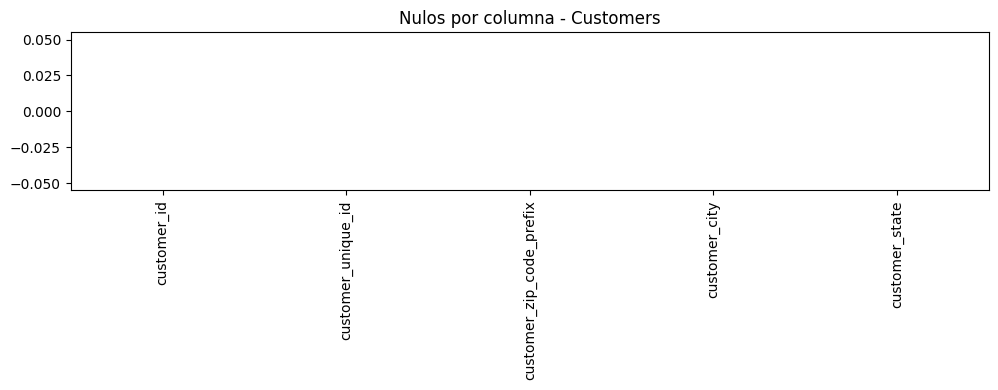

   REPORTE: Orders

📌 Shape (filas, columnas): (99441, 8)

📌 Tipos de datos:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

📌 Nulos por columna:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

📌 Porcentaje de nulos (%):
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_approved_at                0.16
order_delivered_carrier_date    

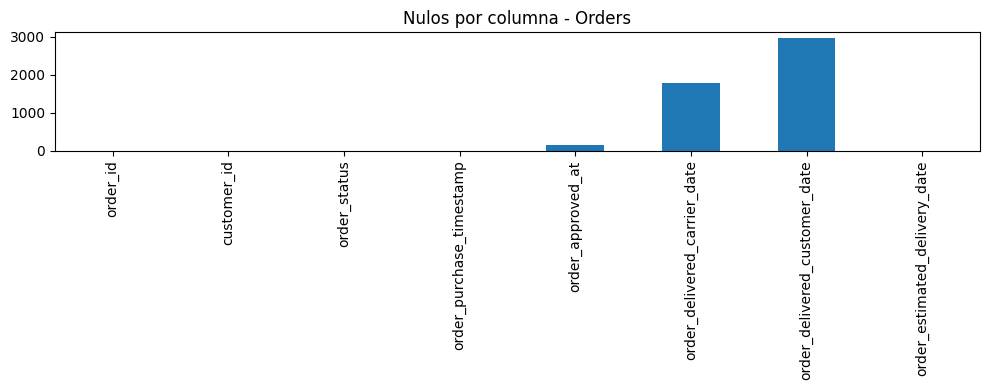

   REPORTE: Order Items

📌 Shape (filas, columnas): (112650, 7)

📌 Tipos de datos:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

📌 Nulos por columna:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

📌 Porcentaje de nulos (%):
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

📌 Filas duplicadas: 0

📌 Valores únicos por columna:
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value   

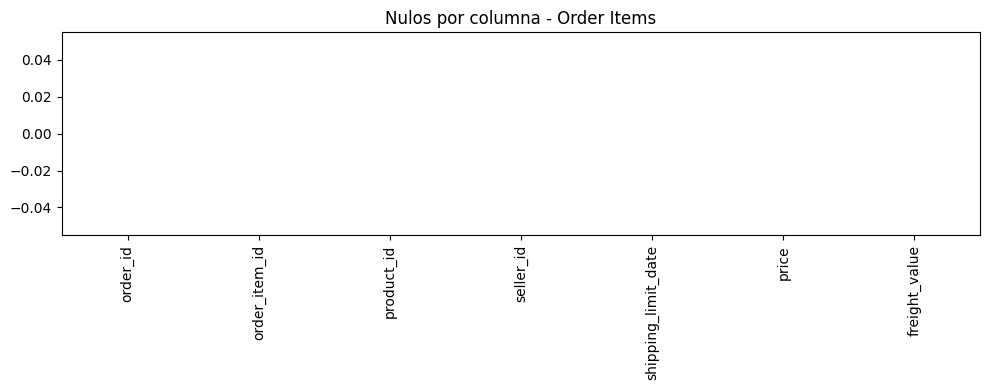

   REPORTE: Products

📌 Shape (filas, columnas): (32951, 9)

📌 Tipos de datos:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

📌 Nulos por columna:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

📌 Porcentaje de nulos (%):
product_id                    0.00
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g     

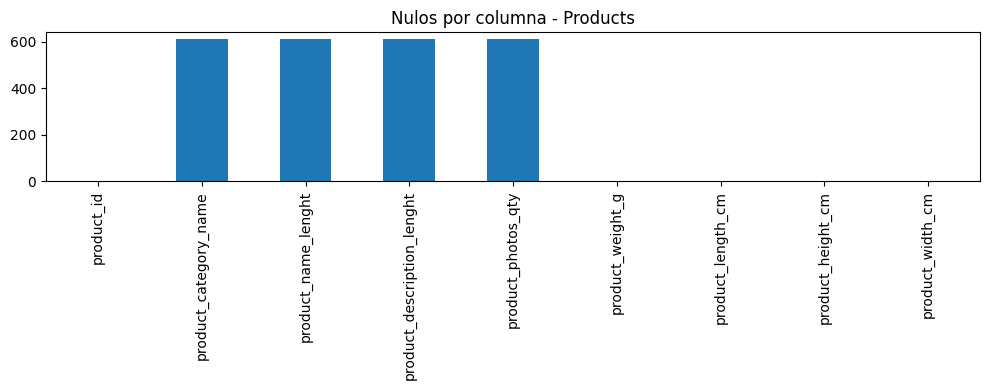

   REPORTE: Sellers

📌 Shape (filas, columnas): (3095, 4)

📌 Tipos de datos:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

📌 Nulos por columna:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

📌 Porcentaje de nulos (%):
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

📌 Filas duplicadas: 0

📌 Valores únicos por columna:
seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64





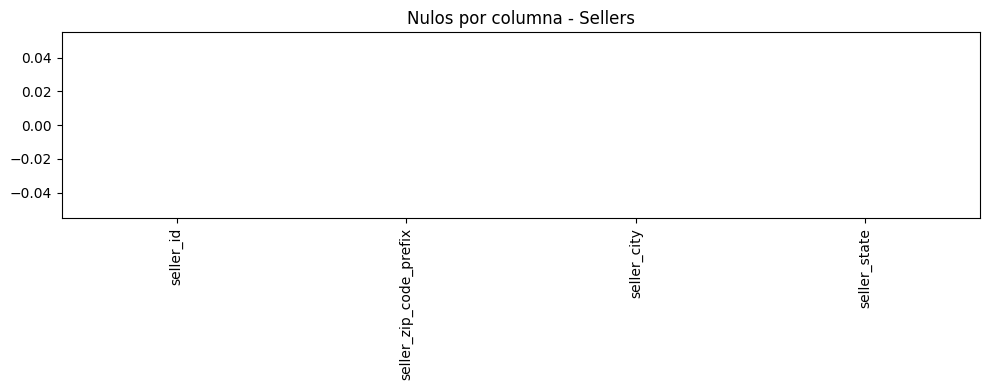

   REPORTE: Payments

📌 Shape (filas, columnas): (103886, 5)

📌 Tipos de datos:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

📌 Nulos por columna:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

📌 Porcentaje de nulos (%):
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

📌 Filas duplicadas: 0

📌 Valores únicos por columna:
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64





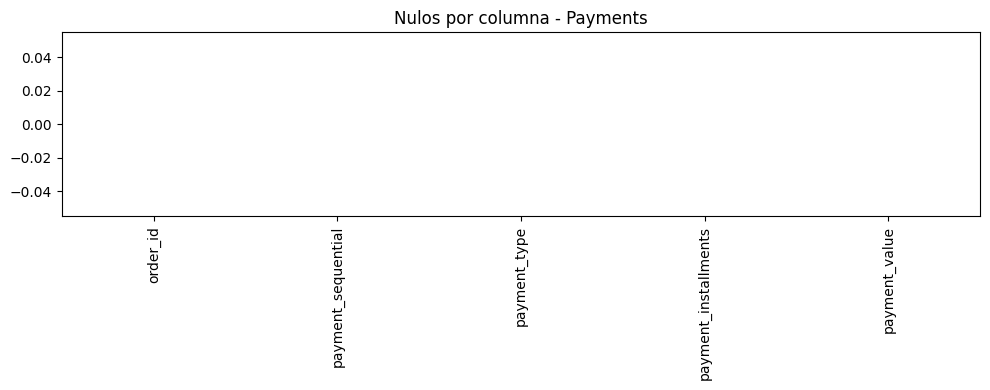

   REPORTE: Reviews

📌 Shape (filas, columnas): (99224, 7)

📌 Tipos de datos:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

📌 Nulos por columna:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

📌 Porcentaje de nulos (%):
review_id                   0.00
order_id                    0.00
review_score                0.00
review_comment_title       88.34
review_comment_message     58.70
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64

📌 Filas duplicadas: 0

📌 Valores únicos por columna:
review_id                  98410
order_id                   98673
review_sco

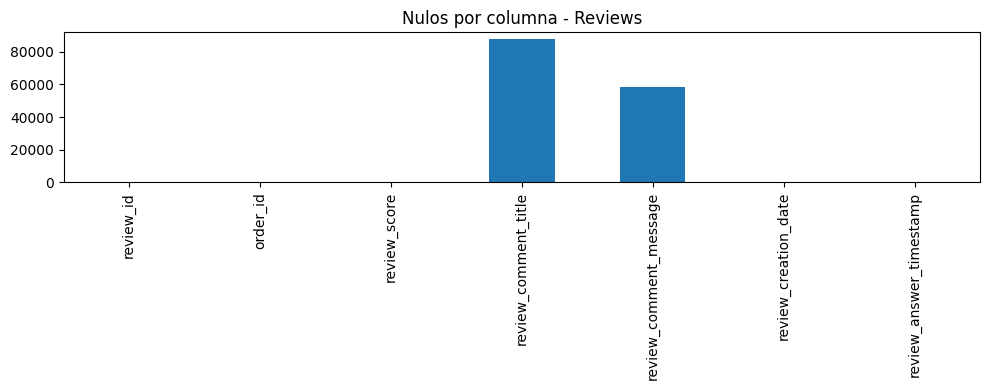

   REPORTE: Geolocation

📌 Shape (filas, columnas): (1000163, 5)

📌 Tipos de datos:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

📌 Nulos por columna:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

📌 Porcentaje de nulos (%):
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

📌 Filas duplicadas: 261831

📌 Valores únicos por columna:
geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64





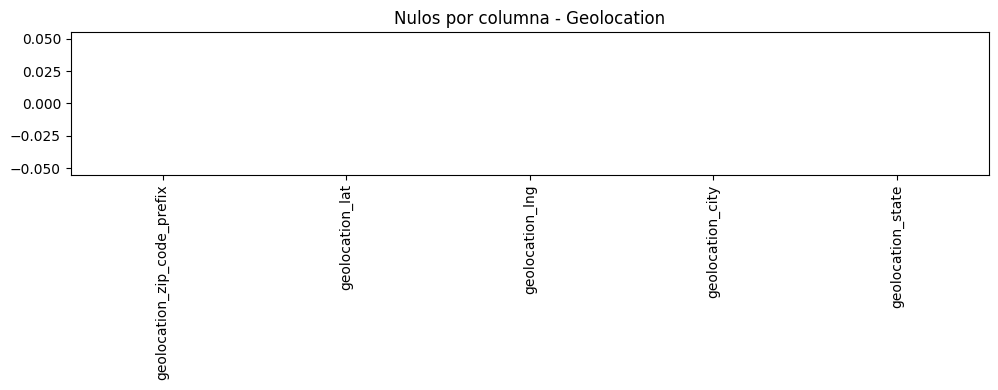

   REPORTE: Translation

📌 Shape (filas, columnas): (71, 2)

📌 Tipos de datos:
product_category_name            object
product_category_name_english    object
dtype: object

📌 Nulos por columna:
product_category_name            0
product_category_name_english    0
dtype: int64

📌 Porcentaje de nulos (%):
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

📌 Filas duplicadas: 0

📌 Valores únicos por columna:
product_category_name            71
product_category_name_english    71
dtype: int64





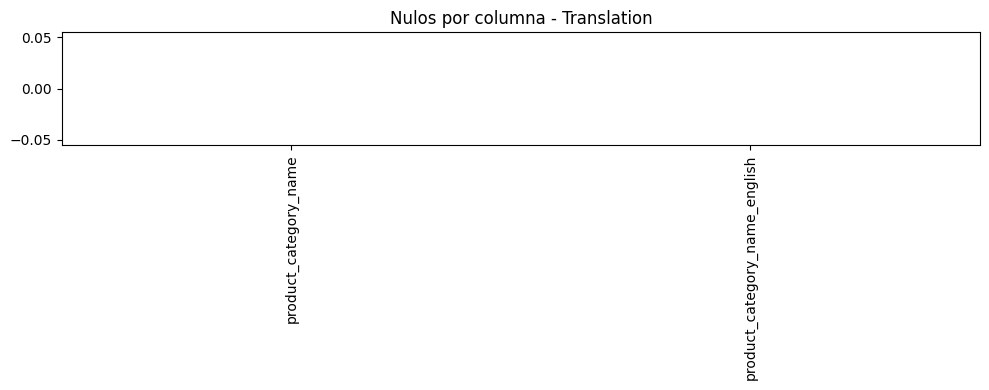

In [25]:
reporte_completo("Customers", customers)
reporte_completo("Orders", orders)
reporte_completo("Order Items", order_items)
reporte_completo("Products", products)
reporte_completo("Sellers", sellers)
reporte_completo("Payments", payments)
reporte_completo("Reviews", reviews)
reporte_completo("Geolocation", geolocation)
reporte_completo("Translation", translation)
